In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("spam.csv",encoding='latin')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.shape

(5572, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
data.rename(columns={'v1':'Target','v2':'Text'},inplace=True)


In [18]:
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sb

In [32]:
data['Target'].value_counts()

Target
ham     4825
spam     747
Name: count, dtype: int64

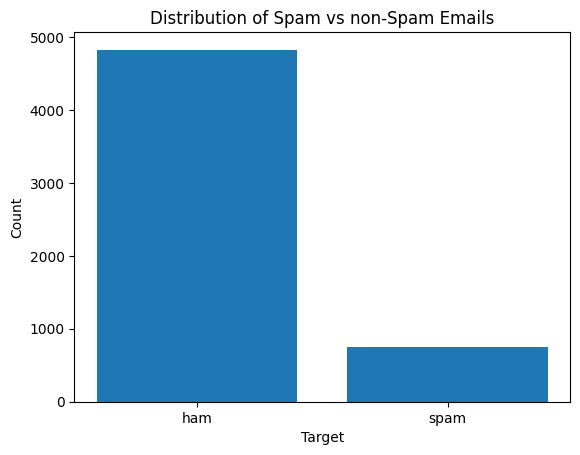

In [34]:
spam_counts = data['Target'].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Spam vs non-Spam Emails')
plt.show()


In [35]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [36]:
data.duplicated().sum()

403

In [37]:
data=data.drop_duplicates(keep='first')

In [38]:
data.duplicated().sum()

0

In [39]:
data.shape

(5169, 2)

In [40]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [42]:
data['Target']=en.fit_transform(data['Target'])

C:\Users\91967\AppData\Local\Temp\ipykernel_2252\2851744072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target']=en.fit_transform(data['Target'])


In [43]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [57]:
x=data['Text']
y=data['Target']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
vec=CountVectorizer()

In [60]:
x=vec.fit_transform(data['Text']).toarray()

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
g=GaussianNB()

In [64]:
g.fit(xtrain,ytrain)

GaussianNB()

In [65]:
ypred=g.predict(xtest)

In [66]:
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
from sklearn.metrics import accuracy_score, classification_report

In [68]:
acc=accuracy_score(ytest,ypred)

In [69]:
acc

0.9129593810444874

In [71]:
print("classification_report",classification_report(ytest,ypred))

classification_report               precision    recall  f1-score   support

           0       0.98      0.91      0.95       903
           1       0.61      0.90      0.72       131

    accuracy                           0.91      1034
   macro avg       0.79      0.91      0.84      1034
weighted avg       0.94      0.91      0.92      1034



In [72]:
d=DecisionTreeClassifier()

In [73]:
d.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
ypred1=d.predict(xtest)

In [76]:
acc=accuracy_score(ytest,ypred1)
acc

0.9555125725338491

In [77]:
print("classification_report",classification_report(ytest,ypred1))

classification_report               precision    recall  f1-score   support

           0       0.97      0.98      0.97       903
           1       0.86      0.78      0.82       131

    accuracy                           0.96      1034
   macro avg       0.91      0.88      0.90      1034
weighted avg       0.95      0.96      0.95      1034



In [83]:
r=RandomForestClassifier(n_estimators=100)

In [84]:
r.fit(xtrain,ytrain)

RandomForestClassifier()

In [85]:
ypred2=r.predict(xtest)

In [86]:
acc=accuracy_score(ytest,ypred2)
acc

0.9690522243713733

In [87]:
print("classification_report",classification_report(ytest,ypred2))

classification_report               precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       0.99      0.76      0.86       131

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034

